<a href="https://colab.research.google.com/github/TobyDavids/Datafest-Data-Science-Project/blob/main/DataDynasty%20Fraud_Detection_for_Online_Payment_Platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Packages for general operating systems and warnings
import os
import warnings
warnings.filterwarnings('ignore')

# Packages for data importing, manipulation, exploratory data analysis, and data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Text customization
from termcolor import colored as cl

# Packages for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline

# Setting plot size and type of plot
plt.rc("font", size = 14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

# Data Preprocessing Libraries
from sklearn import metrics
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

# Statistical Libraries
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

# Model Libraries
import xgboost as xgb
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor

# Accuracy Libraries
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<Figure size 600x300 with 0 Axes>

#### Analyzing Data

In [7]:
# Loading data from copied file from Google Drive
payment = pd.read_csv("/content/drive/MyDrive/DatafestAfrica DS/Copy of FraudDetectionDataset.csv")

In [8]:
# Reading the First Top 5 rows of data
payment.head(5)

,Transaction ID,User ID,Transaction Amount,Transaction Date and Time,Merchant ID,Payment Method,Country Code,Transaction Type,Device Type,IP Address,...,User's Transaction History,Merchant's Reputation Score,User's Device Location,Transaction Currency,Transaction Purpose,User's Credit Score,User's Email Domain,Merchant's Business Age,Transaction Authentication Method,Fraudulent Flag
0,51595306,9822,163.08,2023-01-02 07:47:54,4044,ACH Transfer,KOR,Charity,GPS Device,42.23.223.120,...,26,2.71,United Kingdom,NOK,Consultation Fee,343,cox.co.uk,3,Bluetooth Authentication,0
1,85052974,4698,430.74,2021-09-12 15:15:41,4576,2Checkout,VNM,Cashback,Medical Device,39.52.212.120,...,60,3.95,Mexico,EGP,Cashback Reward,688,gmail.com,13,NFC Tag,1
2,23954324,8666,415.74,2023-01-12 17:25:58,4629,Google Wallet,MEX,Reward,Vehicle Infotainment System,243.180.236.29,...,81,3.81,Qatar,MXN,Acquisition,371,rocketmail.com,7,Token,1
3,44108303,9012,565.89,2021-02-27 11:31:00,3322,Check,SGP,Purchase,Kiosk,212.186.227.14,...,18,2.67,Spain,CLP,Loan Repayment,687,roadrunner.co.uk,15,Time-Based OTP,1
4,66622683,5185,955.49,2022-09-24 04:06:38,7609,Worldpay,HKG,Acquisition,Smart Mirror,166.113.10.199,...,98,3.19,Israel,RUB,Dividend Reinvestment,605,protonmail.co.uk,17,Password,1


In [9]:
# Viewing Data information
payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   User ID                            int64  
 2   Transaction Amount                 float64
 3   Transaction Date and Time          object 
 4   Merchant ID                        int64  
 5   Payment Method                     object 
 6   Country Code                       object 
 7   Transaction Type                   object 
 8   Device Type                        object 
 9   IP Address                         object 
 10  Browser Type                       object 
 11  Operating System                   object 
 12  Merchant Category                  object 
 13  User Age                           int64  
 14  User Occupation                    object 
 15  User Income                        float64
 16  User Gender       

In [10]:
# Checking for missing values in data

payment.isnull().sum()

Transaction ID                       0
User ID                              0
Transaction Amount                   0
Transaction Date and Time            0
Merchant ID                          0
Payment Method                       0
Country Code                         0
Transaction Type                     0
Device Type                          0
IP Address                           0
Browser Type                         0
Operating System                     0
Merchant Category                    0
User Age                             0
User Occupation                      0
User Income                          0
User Gender                          0
User Account Status                  0
Transaction Status                   0
Location Distance                    0
Time Taken for Transaction           0
Transaction Time of Day              0
User's Transaction History           0
Merchant's Reputation Score          0
User's Device Location               0
Transaction Currency     

In [11]:
# Finding the minimum and maximum Transaction Amount
min_transaction_amount = payment['Transaction Amount'].min()
max_transaction_amount = payment['Transaction Amount'].max()

print("Minimum Transaction Amount:", min_transaction_amount)
print("Maximum Transaction Amount:", max_transaction_amount)

Minimum Transaction Amount: 1.0
Maximum Transaction Amount: 1000.0


In [12]:
# Checking the data columns

payment.columns

Index(['Transaction ID', 'User ID', 'Transaction Amount',
       'Transaction Date and Time', 'Merchant ID', 'Payment Method',
       'Country Code', 'Transaction Type', 'Device Type', 'IP Address',
       'Browser Type', 'Operating System', 'Merchant Category', 'User Age',
       'User Occupation', 'User Income', 'User Gender', 'User Account Status',
       'Transaction Status', 'Location Distance', 'Time Taken for Transaction',
       'Transaction Time of Day', 'User's Transaction History',
       'Merchant's Reputation Score', 'User's Device Location',
       'Transaction Currency', 'Transaction Purpose', 'User's Credit Score',
       'User's Email Domain', 'Merchant's Business Age',
       'Transaction Authentication Method', 'Fraudulent Flag'],
      dtype='object')

#### Fraud Analysis

In [13]:
# Analyzing the fraudulent transaction history
Total_transactions = len(payment)
normal_transactions = len(payment[payment['Fraudulent Flag'] == 0])
fraudulent_transactions = len(payment[payment['Fraudulent Flag'] == 1])
fraud_percentage = round(fraudulent_transactions / normal_transactions * 100, 2)

print("Total Transactions:", Total_transactions)
print("Normal Transactions:", normal_transactions)
print("Fraudulent Transactions:", fraudulent_transactions)
print("Percentage Of Fraud Transaction is:", fraud_percentage)

Total Transactions: 6000000
Normal Transactions: 3000094
Fraudulent Transactions: 2999906
Percentage Of Fraud Transaction is: 99.99


In [14]:
fraud = payment[payment['Fraudulent Flag'] == 1]


In [15]:
fraud['Transaction Amount'].describe()

count    2.999906e+06
mean     5.005699e+02
std      2.883830e+02
min      1.000000e+00
25%      2.506100e+02
50%      5.004800e+02
75%      7.504300e+02
max      1.000000e+03
Name: Transaction Amount, dtype: float64

In [16]:
genuine = payment[payment['Fraudulent Flag'] == 0]

In [17]:
genuine['Transaction Amount'].describe()

count    3.000094e+06
mean     5.005332e+02
std      2.884503e+02
min      1.000000e+00
25%      2.509500e+02
50%      5.005400e+02
75%      7.504500e+02
max      1.000000e+03
Name: Transaction Amount, dtype: float64

#### Exploratory Data Analysis

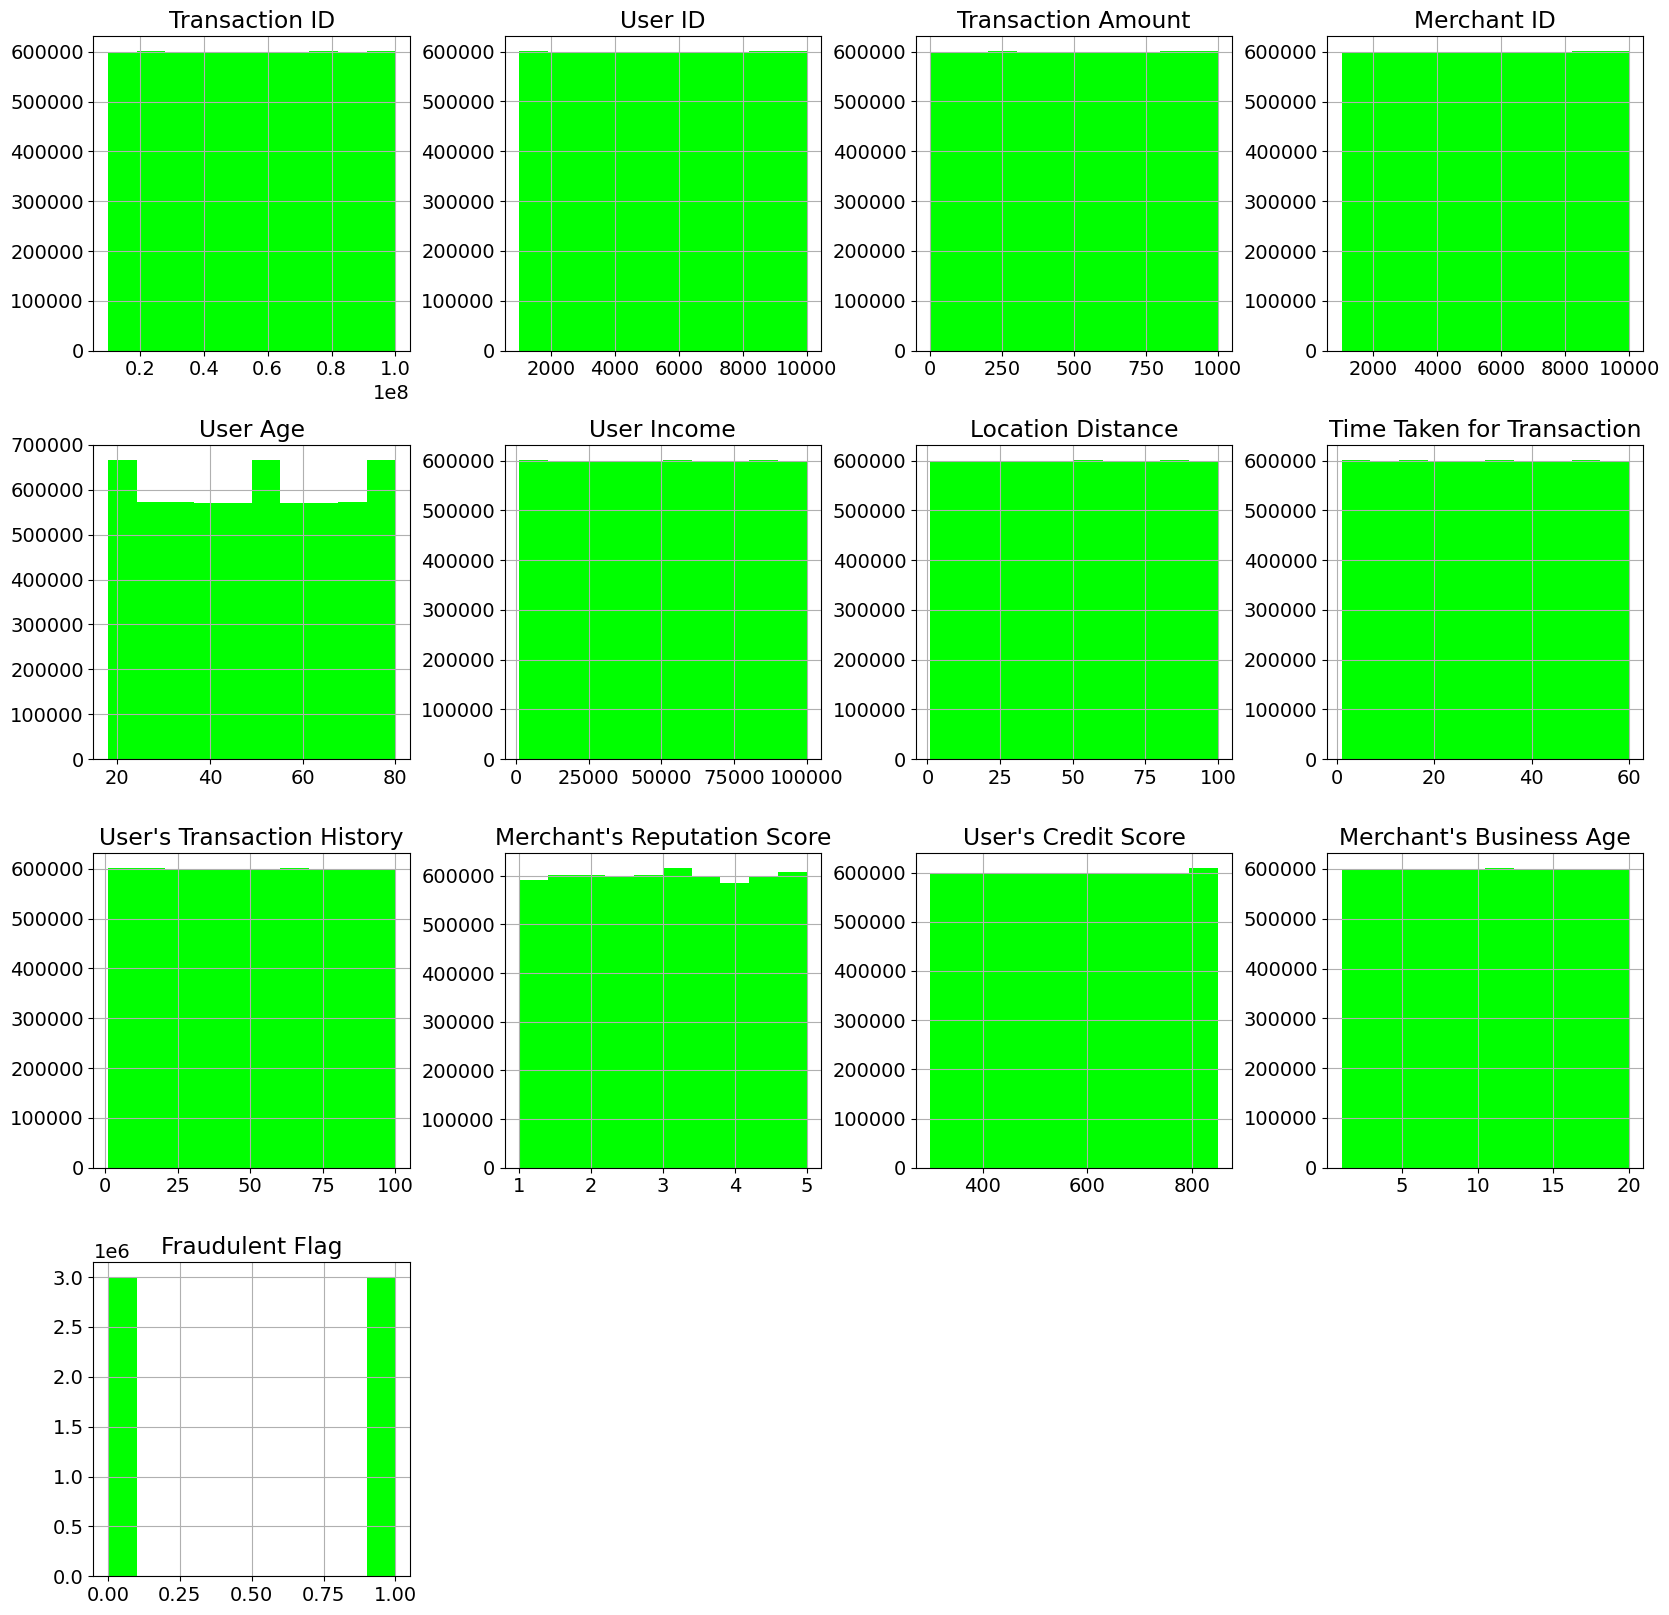

In [18]:
payment.hist(figsize=(20,20), color='lime')
plt.show()

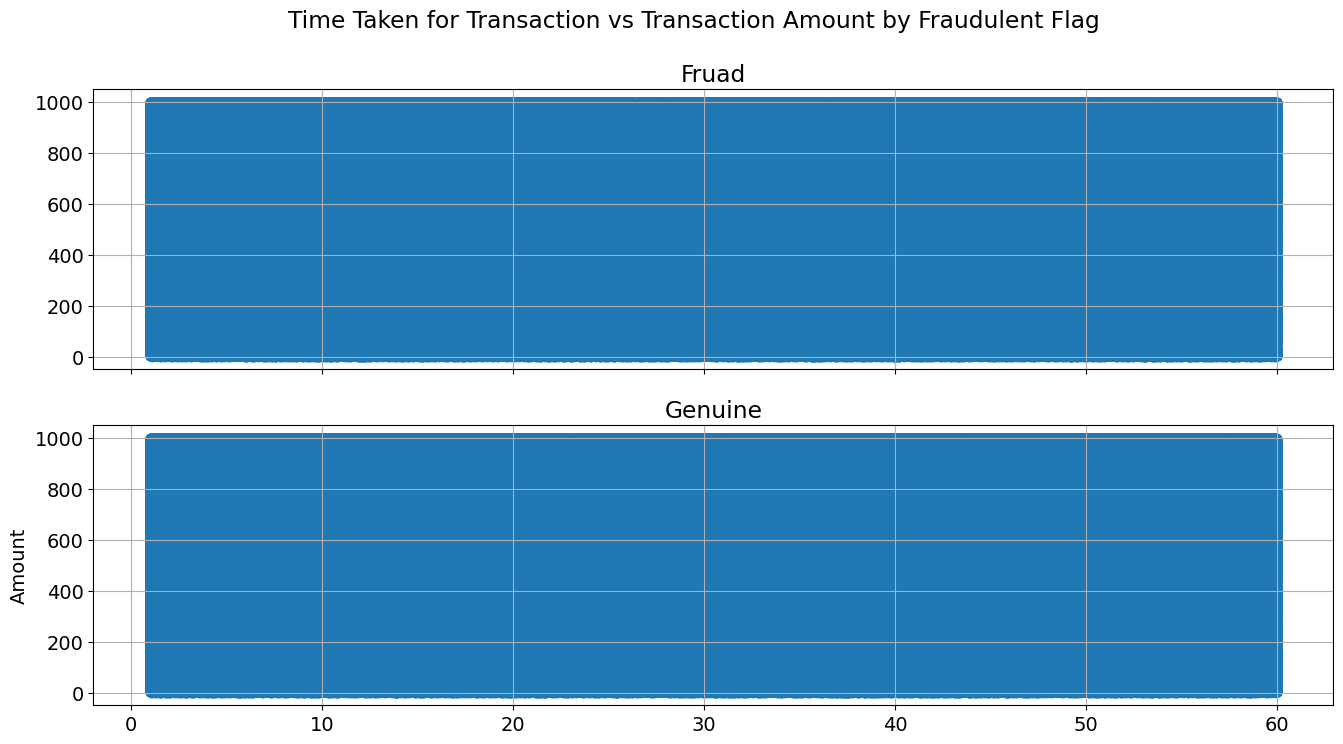

In [19]:
rcParams['figure.figsize'] = (16,8)
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time Taken for Transaction vs Transaction Amount by Fraudulent Flag')
ax1.scatter(fraud['Time Taken for Transaction'], fraud['Transaction Amount'])
ax1.set_title('Fruad')
ax2.scatter(genuine['Time Taken for Transaction'], genuine['Transaction Amount'])
ax2.set_title('Genuine')
plt.xlabel = ('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

#### Correlation

<Axes: >

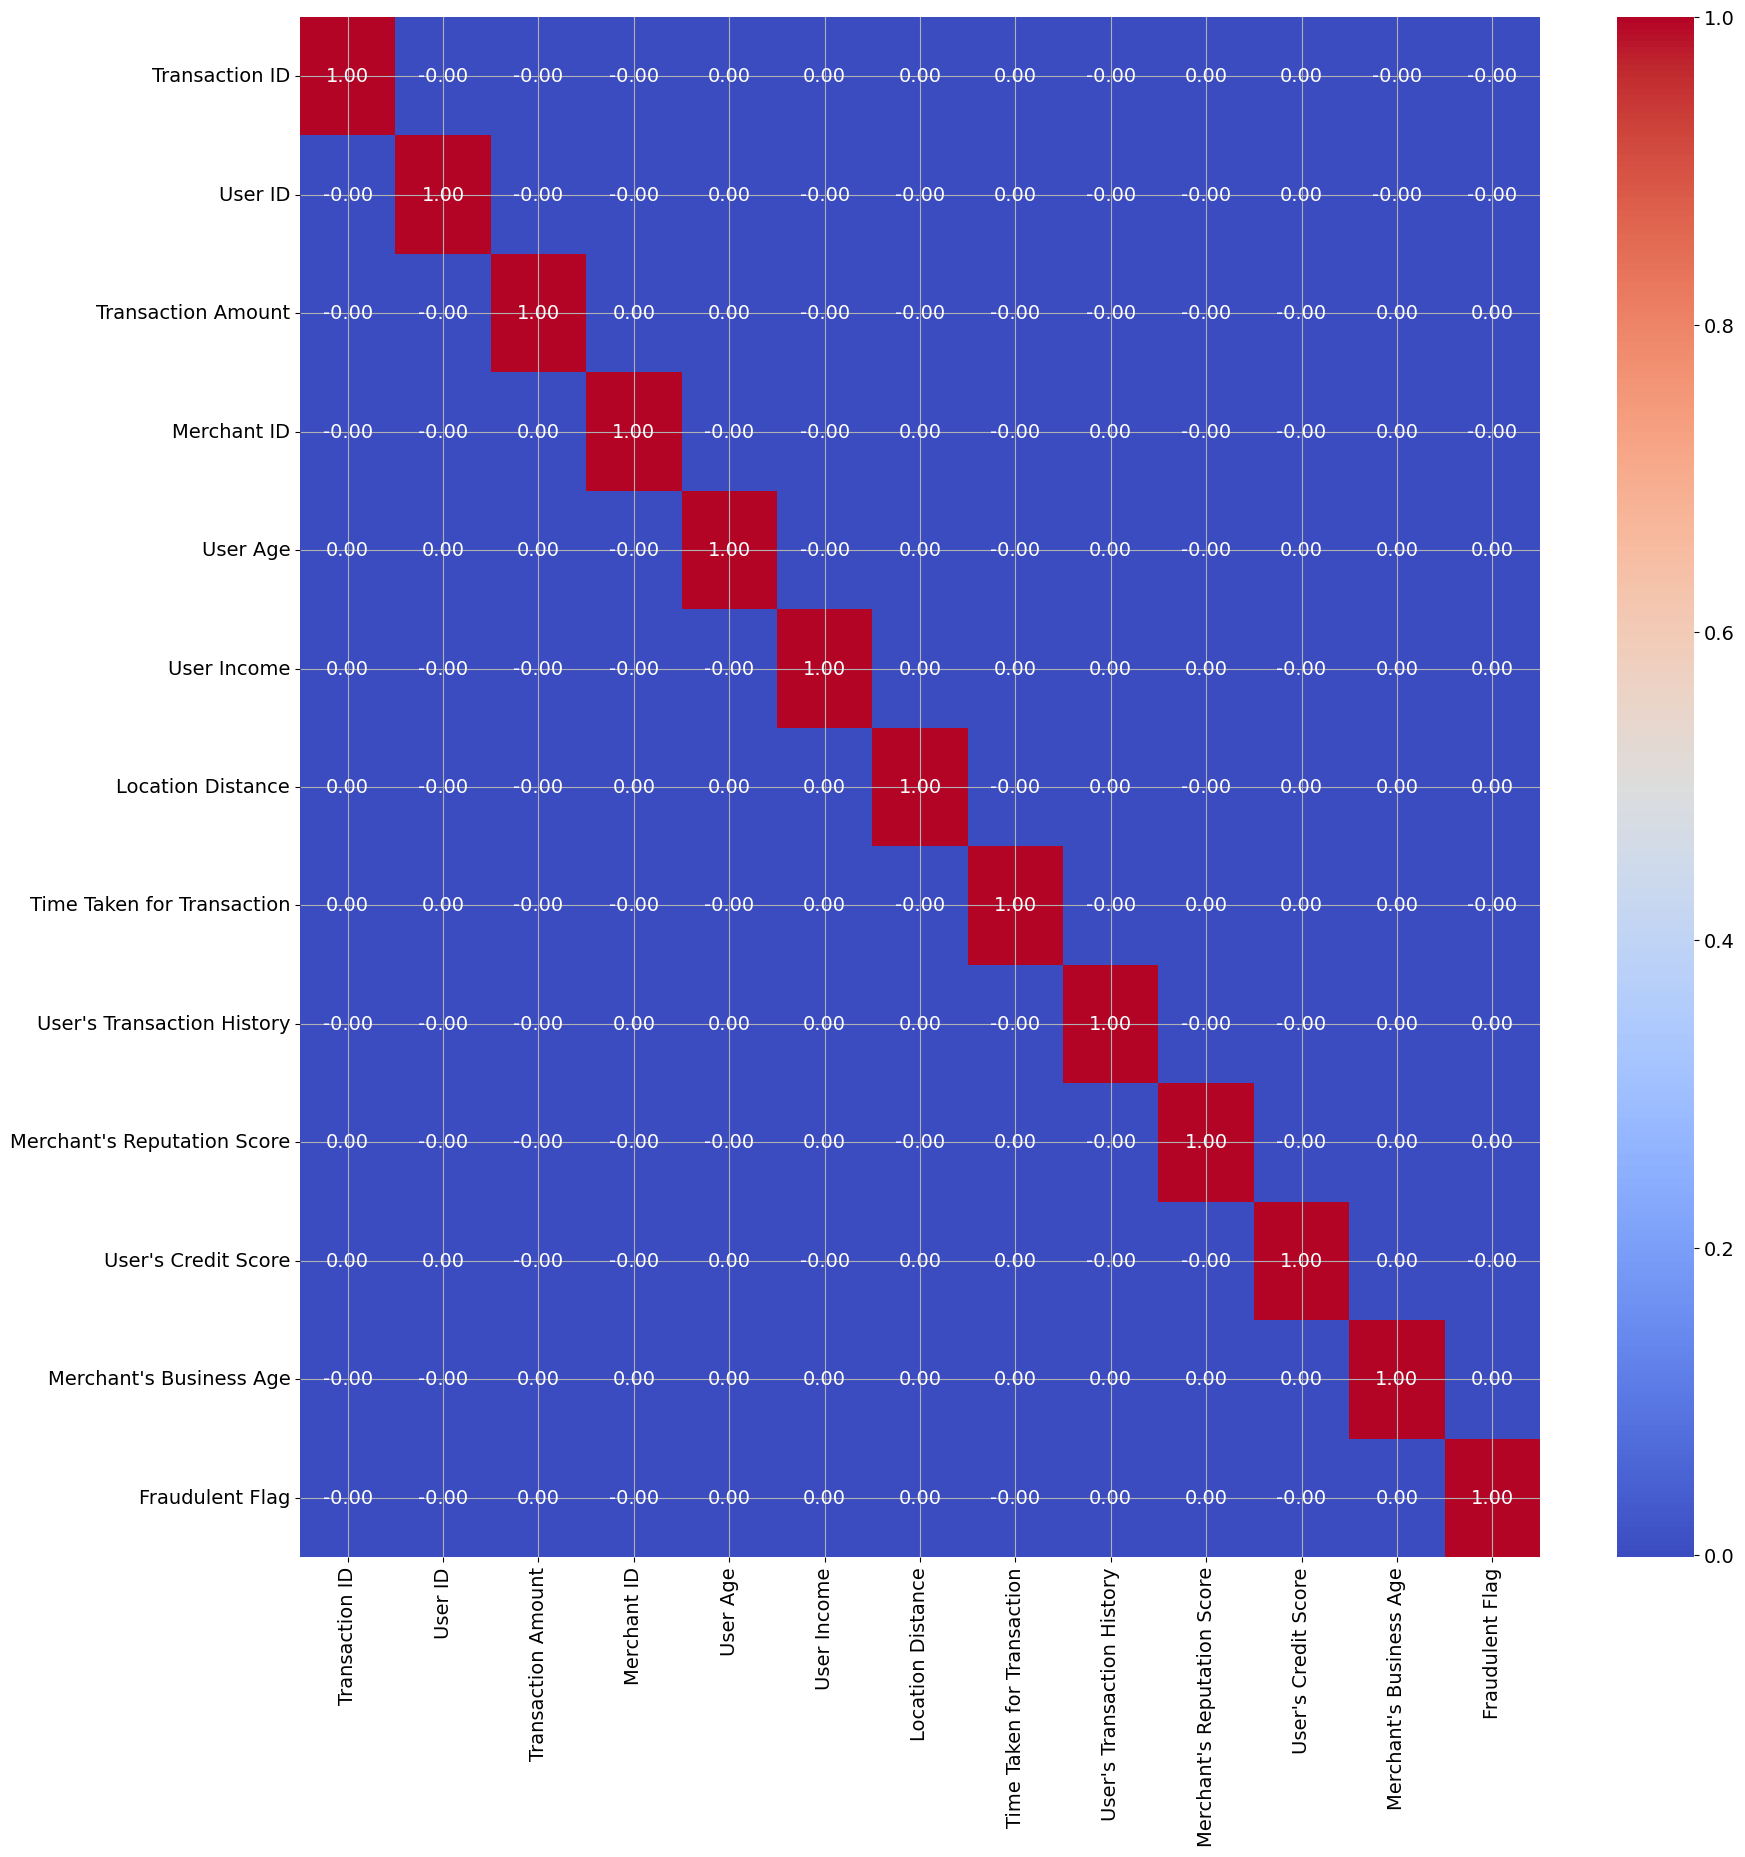

In [20]:
plt.figure(figsize=(20,20))
corr = payment.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=corr.columns, yticklabels=corr.columns)

#### Scaling Variable

In [21]:
# Remove irrelevant columns
data = payment.drop(["Transaction ID", "User ID", "Merchant ID", "Transaction Date and Time"], axis=1)

In [22]:
data.shape

(6000000, 28)

In [23]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ["Payment Method", "Country Code", "Transaction Authentication Method",
                        "Transaction Purpose", "Transaction Currency",
                        "Transaction Time of Day", "Transaction Status",
                       "User Account Status", "User Gender", "User Occupation", "Merchant Category",
                       "Operating System", "Browser Type", "Device Type", "Payment Method", "Transaction Type",
                       "Country Code", "User's Device Location", "IP Address", "User's Email Domain"]
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [24]:
# Normalize numerical features
scaler = StandardScaler()
data[["Transaction Amount", "User Income", "Merchant's Business Age",
      "User's Credit Score", "Merchant's Reputation Score", "User's Transaction History",
      "Time Taken for Transaction", "Location Distance", "Transaction Amount",
      "User Age"]] = scaler.fit_transform(data[["Transaction Amount", "User Income", "Merchant's Business Age",
      "User's Credit Score", "Merchant's Reputation Score", "User's Transaction History",
      "Time Taken for Transaction", "Location Distance", "Transaction Amount",
      "User Age"]])

In [25]:
# Step 3: Data Splitting
X = data.drop('Fraudulent Flag', axis=1)
y = data['Fraudulent Flag']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Model Building

In [26]:
# Decsison Tree

DT = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
DT.fit(X_train, y_train)
dt_yhat = DT.predict(X_test)

In [27]:
# Checking the accuracy of model

print('Accuracy of Decision Tree Model is: {}'.format(accuracy_score(y_test, dt_yhat)))

Accuracy of Decision Tree Model is: 0.4995966666666667


In [28]:
# Checking F1 of model

print('F1 of Decision Tree mode is: {}'.format(f1_score(y_test, dt_yhat)))

F1 of Decision Tree mode is: 0.590028237941525


In [29]:
# Checking confusion_matrix

cf_matrix =confusion_matrix(y_test, dt_yhat, labels=[0, 1])

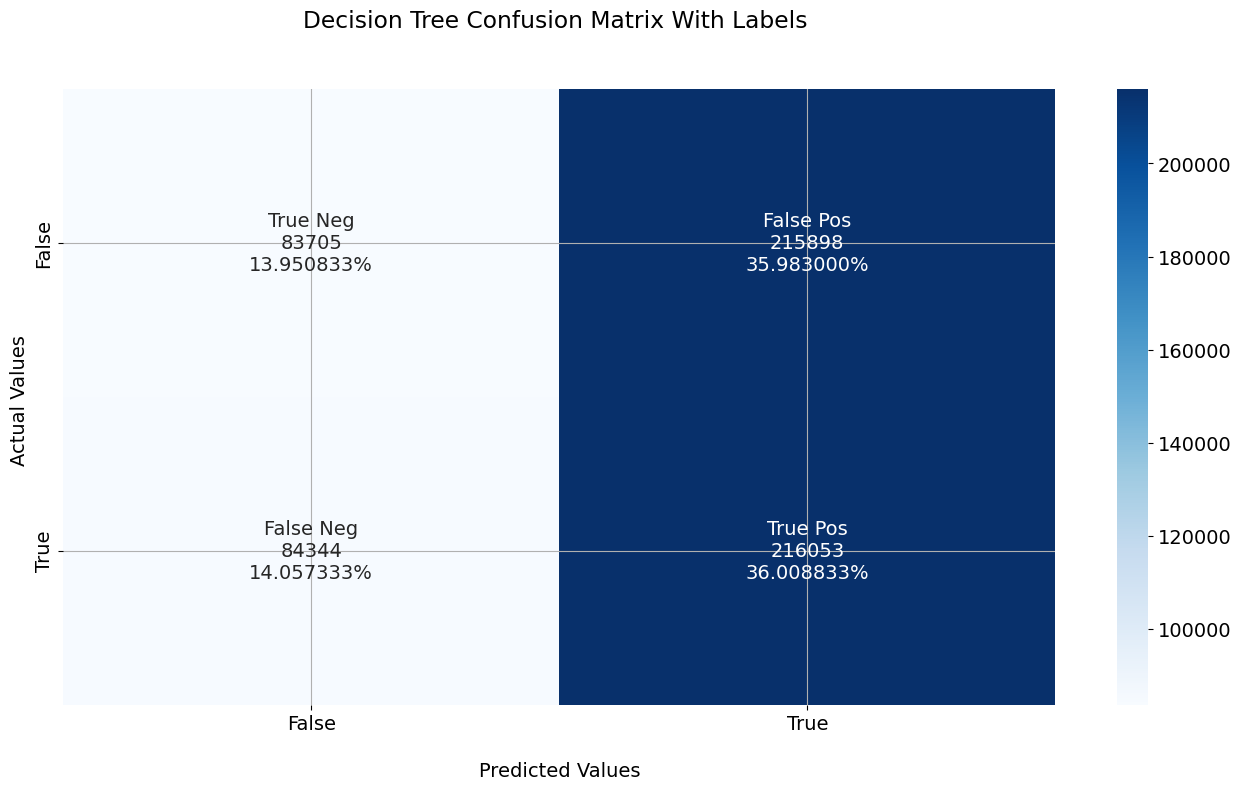

In [30]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]

group_percentages = ["{0:2%}". format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.array(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Decision Tree Confusion Matrix With Labels \n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

#List must be in alphabetical order

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

#Display
plt.show()

In [ ]:
# K-Nearest Neighbors

n = 7
KNN = KNeighborsClassifier(n_neighbors=n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

In [ ]:
# Checking the accuracy of model

print('Accuracy of K-Nearest Neighbors Model is: {}'.format(accuracy_score(y_test, knn_yhat)))

In [ ]:
# Checking the F1 score of model

print('F1 of K-Nearest Neighbors Model is: {}'.format(f1_score(y_test, knn_yhat)))

In [ ]:
# Checking confusion matrix

cf1_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1])

In [ ]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cf1_matrix.flatten()]

group_percentages = ["{0:2%}". format(value) for value in cf1_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.array(labels).reshape(2,2)

ax = sns.heatmap(cf1_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('K-Nearest Neighbors Confusion Matrix With Labels \n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

#List must be in alphabetical order

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

#Display
plt.show()

In [ ]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

In [ ]:
# Checking accuracy score of the Logistic Regression

print('Accuracy Score of the Logistic Regression Model is: {}'.format(accuracy_score(y_test, lr_yhat )))

Accuracy Score of the Logistic Regression Model is: 0.49933833333333333


In [ ]:
# Checking F1 of the Logistic Regression

print('F1 Score of the Logistic Regression Model is: {}'.format(f1_score(y_test, lr_yhat)))

F1 Score of the Logistic Regression Model is: 0.0


In [ ]:
# Confusion matrix

cf2_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1])

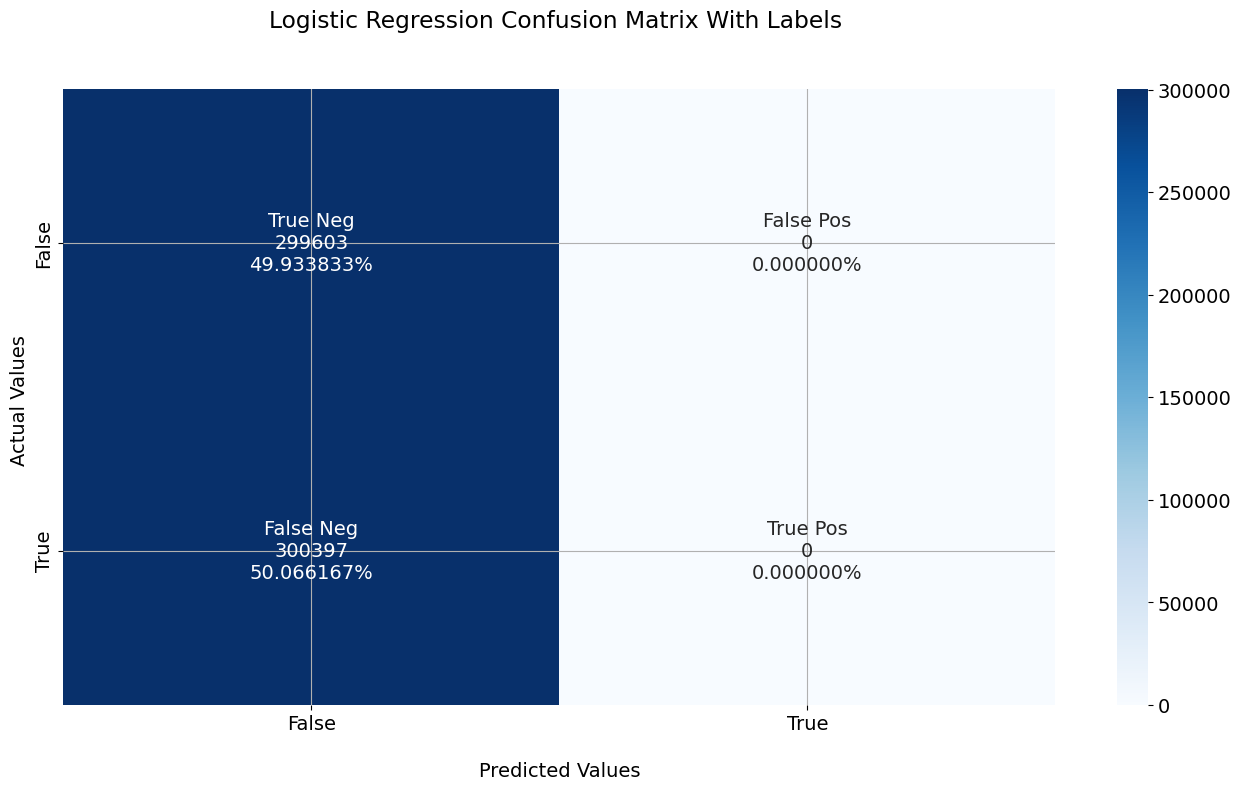

In [ ]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cf2_matrix.flatten()]

group_percentages = ["{0:2%}". format(value) for value in cf2_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.array(labels).reshape(2,2)

ax = sns.heatmap(cf2_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Logistic Regression Confusion Matrix With Labels \n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

#List must be in alphabetical order

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

#Display
plt.show()

In [ ]:
# Support vector machines
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

In [ ]:
# Checking accuracy score of SVM

print('Accuracy Score of the SVM model is: {} '.format(accuracy_score(y_test, svm_yhat)))

In [ ]:
# Checking the F1 Score of SVM

print('F1 score of SVM Model is: {}'.format(f1_score(y_test, svm_yhat)))

In [ ]:
# Confusion matrix

cf3_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1])

In [ ]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cf3_matrix.flatten()]

group_percentages = ["{0:2%}". format(value) for value in cf3_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.array(labels).reshape(2,2)

ax = sns.heatmap(cf3_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Support Vector Machines Confusion Matrix With Labels \n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

#List must be in alphabetical order

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

#Display
plt.show()

In [ ]:
# Random Forest

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

In [ ]:
# Accuracy score of the Random Forest Classifier

print('Accuracy Score of the Random Forest Classifier Model is: {}'.format(accuracy_score(y_test, rf_yhat)))

Accuracy Score of the Random Forest Classifier Model is: 0.4991583333333333


In [ ]:
# F1 score of the Random Forest Classifier

print('F1 score of the Random Forest Classifier Model is: {}'.format(f1_score(y_test, rf_yhat )))

F1 score of the Random Forest Classifier Model is: 0.3756998589375232


In [ ]:
# Confusion matrix

cf4_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1])

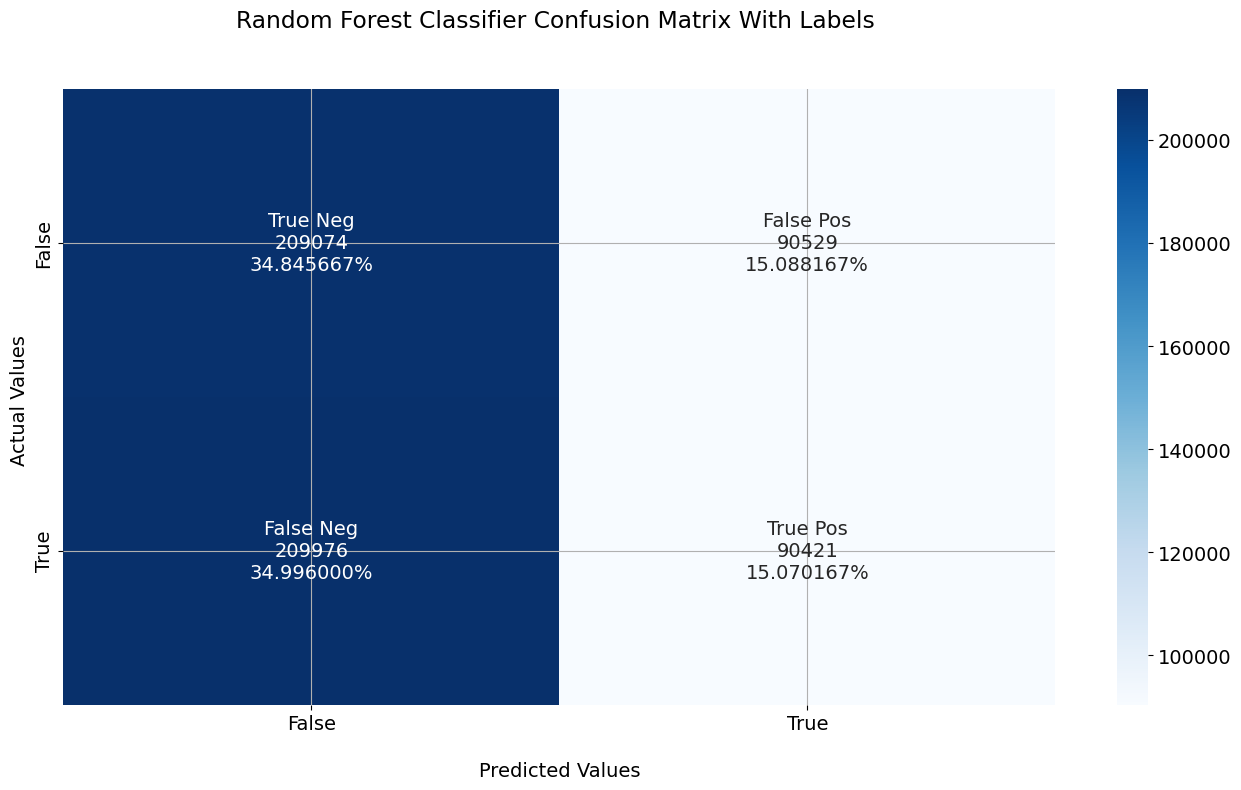

In [ ]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cf4_matrix.flatten()]

group_percentages = ["{0:2%}". format(value) for value in cf4_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.array(labels).reshape(2,2)

ax = sns.heatmap(cf4_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Random Forest Classifier Confusion Matrix With Labels \n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

#List must be in alphabetical order

ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

#Display
plt.show()

In [ ]:
import pickle

In [ ]:
# Saving the model
filename = 'trained_model_Loan_Pred.pkl'
pickle.dump(lr, open(filename, 'wb')) #change the lr to the best model name